<a href="https://colab.research.google.com/github/elaiinechenn/Python_Projects/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm  #api加進來，sm套件
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler    #平均值和標準差
                                                    #https://ithelp.ithome.com.tw/articles/10240494

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import seaborn as sns

# 相關文獻

[Mosky-stat-reg](https://speakerdeck.com/mosky/statistical-regression-with-python?slide=63)




# 資料解讀

In [5]:
df_data = pd.read_excel('/content/drive/MyDrive/Housing.xlsx')

<Axes: xlabel='House Price', ylabel='Proportion'>

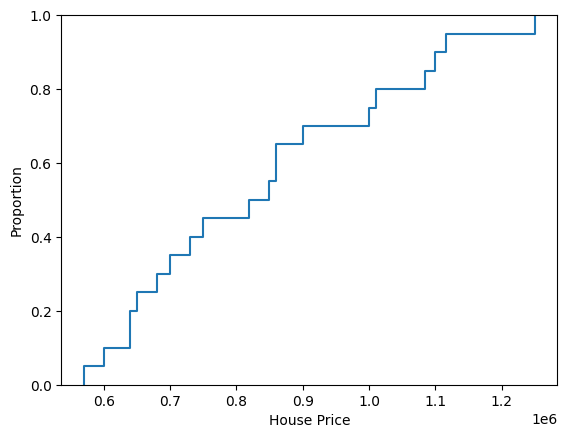

In [6]:
sns.ecdfplot(data=df_data, x='House Price')

In [7]:
#df_data.boxplot()

In [8]:
df_data.head() 

# House Price: 房價
# House Size (sq.ft.): 房子大小
# State: 州別
# Number of Rooms: 房間數量
# Year of Construction: 建造年份

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


# 一元回歸：一個元素的回歸


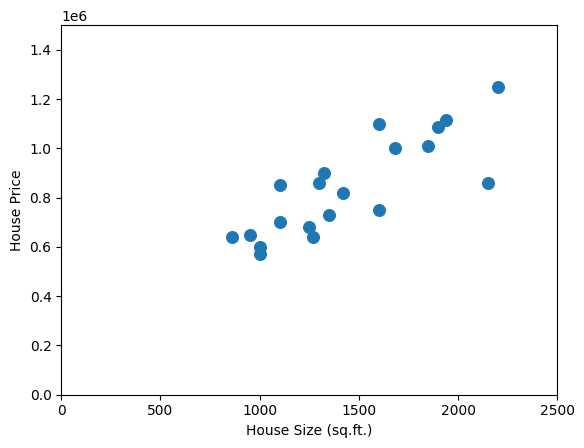

In [9]:
X = df_data['House Size (sq.ft.)']     #散點圖
Y = df_data['House Price']             #房價

plt.scatter(X,Y,s=70)                  #s:改變點的大小
plt.axis([0, 2500, 0, 1500000])
plt.xlabel('House Size (sq.ft.)')      #xlabel名稱
plt.ylabel('House Price')              #ylabel名稱
plt.show()

In [10]:
X1 = sm.add_constant(X)

In [11]:
model_reg = sm.OLS(Y, X1).fit()       #sm套件，可以幫忙排版

In [12]:
print(model_reg.summary2())           #理解線性迴歸在幹嘛，會用model_reg的套件

#dependent variable異變數，R-squared跟Adj. R-squared基本上是一樣的，一個是有調整過的

#y=ax+b
#a: House Size
#p: 要小於0.05

                        Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared:         0.660     
Dependent Variable:     House Price          AIC:                    524.8504  
Date:                   2023-06-03 19:04     BIC:                    526.8419  
No. Observations:       20                   Log-Likelihood:         -260.43   
Df Model:               1                    F-statistic:            37.95     
Df Residuals:           18                   Prob (F-statistic):     8.13e-06  
R-squared:              0.678                Scale:                  1.3286e+10
-------------------------------------------------------------------------------
                       Coef.     Std.Err.    t    P>|t|    [0.025      0.975]  
-------------------------------------------------------------------------------
const               260806.2361 97562.8498 2.6732 0.0155 55834.2946 465778.1775
House Size (sq.ft.)    401.9163    65.2430 6.1603 0.0000   264.8

In [13]:
260806+ 1000 * 402      #402: House Size

662806

In [14]:
stats.linregress(X,Y)  #slope:斜率，節距：intercept

LinregressResult(slope=401.91628631922595, intercept=260806.2360560964, rvalue=0.8235775534696924, pvalue=8.129642377231308e-06, stderr=65.24299510636492, intercept_stderr=97562.84981403727)

In [15]:
from sklearn.linear_model import LinearRegression        #未來會很常用到這個套件

In [16]:
X.values.reshape(-1,1)                                   #做維度的處理

array([[1940],
       [1300],
       [1420],
       [1680],
       [1270],
       [1850],
       [1000],
       [1100],
       [1600],
       [1000],
       [2150],
       [1900],
       [2200],
       [1100],
       [ 860],
       [1325],
       [1350],
       [1600],
       [ 950],
       [1250]])

In [17]:
reg = LinearRegression().fit(X.values.reshape(-1, 1), Y.values.reshape(-1, 1))

reg.coef_, reg.intercept_

(array([[401.91628632]]), array([260806.2360561]))

# 多元回歸

In [18]:
df_data.corr()      #Number of Rooms,(sq.ft.)：相關性很高 （相關性極高的特徵會去掉，沒有太大的幫助）

<ipython-input-18-1e49db4f212d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.corr()      #Number of Rooms,(sq.ft.)：相關性很高 （相關性極高的特徵會去掉，沒有太大的幫助）


,House Price,House Size (sq.ft.),Number of Rooms,Year of Construction
House Price,1.000000,0.823578,0.795015,0.292898
House Size (sq.ft.),0.823578,1.000000,0.936765,0.067741
Number of Rooms,0.795015,0.936765,1.000000,0.104080
Year of Construction,0.292898,0.067741,0.104080,1.000000


In [19]:
df_data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [20]:
X = df_data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']]
X = df_data[[ 'Number of Rooms', 'Year of Construction']]
X = df_data[['House Size (sq.ft.)', 'Number of Rooms']]


Y = df_data['House Price']


In [21]:
X1 = sm.add_constant(X)            #先加這個東西

In [22]:
model_reg = sm.OLS(Y, X1).fit()    #餵到這裡面

In [23]:
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           5.77e-05
Time:                        19:04:07   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1

## california housing

In [24]:
df_data_ca = pd.read_csv('/content/sample_data/california_housing_train.csv') 
df_data_ca.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [25]:
df_data_ca.corr() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


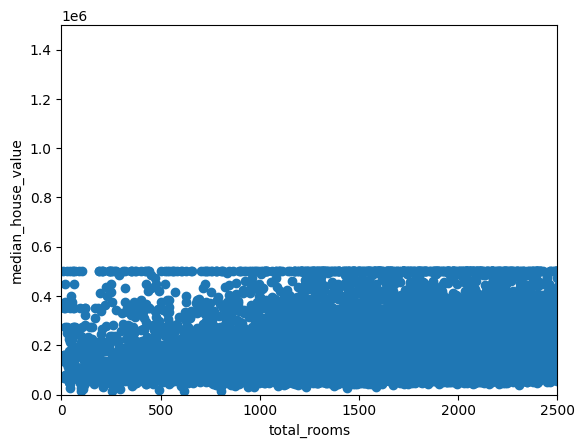

In [26]:
X = df_data_ca['total_rooms']
Y = df_data_ca['median_house_value']

plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.show()

In [27]:
X1 = df_data_ca[['total_rooms', 'total_bedrooms', 'population','households']]
Y = df_data_ca['median_house_value']

In [28]:
# X = df_data_ca[['total_rooms', 'total_bedrooms', 'population','households']]
# X = df_data_ca[['total_rooms', 'households']]
# X = df_data_ca[['total_bedrooms', 'population']]


# Y = df_data_ca['median_house_value']

In [29]:
X1 = sm.add_constant(X)            #先加這個東西

In [30]:
model_reg = sm.OLS(Y, X1).fit()    #餵到這裡面

In [31]:
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     296.8
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           6.08e-66
Time:                        19:04:07   Log-Likelihood:            -2.2221e+05
No. Observations:               17000   AIC:                         4.444e+05
Df Residuals:                   16998   BIC:                         4.444e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.889e+05   1386.257    136.249      

In [32]:
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [33]:
# test_X1 = df_test[['longitude','latitude','housing_median_age	','total_rooms',
#                    'total_bedrooms','population','households','median_income','median_house_value'
#                    ]]
# test_X1 = 
# test_Y = df_test.median_house_value

In [34]:
# len(test_X1),len(test_Y)

In [35]:
# plt.scatter(model_reg.predict(test_X1), test_Y)

In [36]:
# np.mean(np.abs(model_reg.predict(test_X1)- test_Y))

<Axes: xlabel='median_house_value', ylabel='Proportion'>

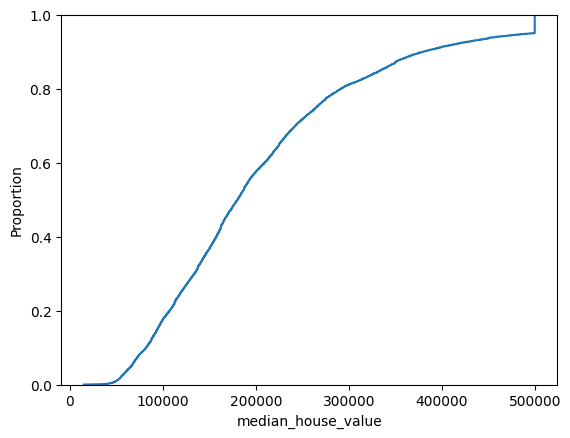

In [37]:
sns.ecdfplot(data=df_data_ca, x='median_house_value')

In [38]:
df_data_ca.describe().T
# df_data_ca.info()

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


<Axes: xlabel='median_house_value', ylabel='Density'>

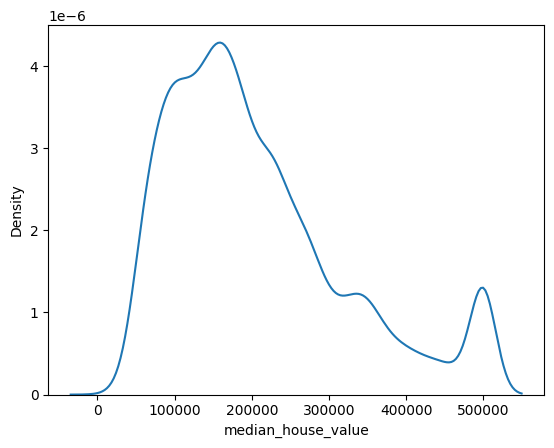

In [39]:
sns.kdeplot(df_data_ca['median_house_value']) #核密度圖(kdeplot)
# sns.rugplot(df_data_ca['total_rooms'])

<ipython-input-40-1a7101aa20cb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data_ca['median_house_value'])    #直方圖(含KDE)(distplot)


<Axes: xlabel='median_house_value', ylabel='Density'>

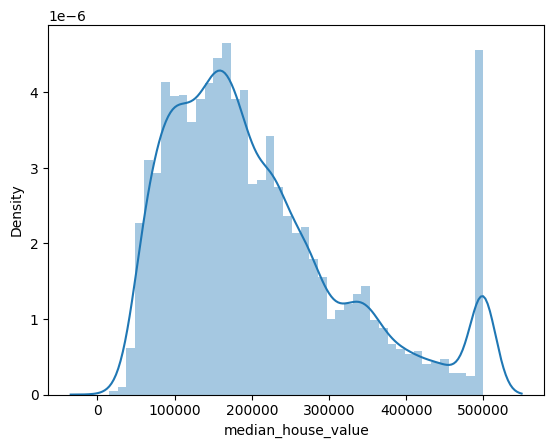

In [40]:
sns.distplot(df_data_ca['median_house_value'])    #直方圖(含KDE)(distplot)

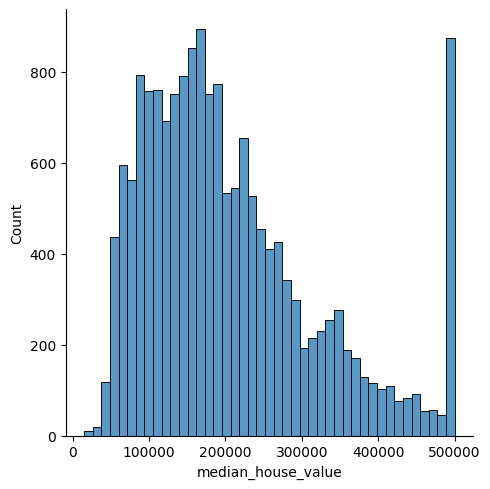

In [41]:
sns.displot(df_data_ca, x='median_house_value')

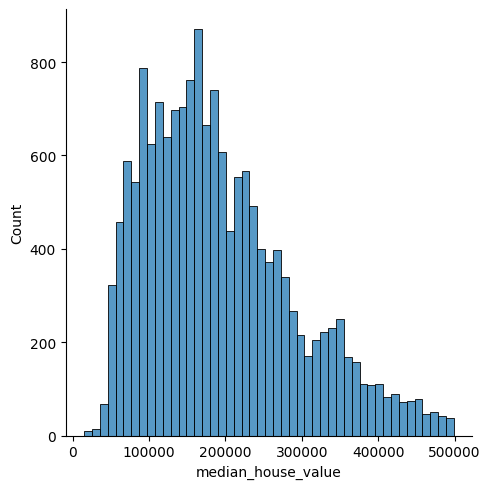

In [42]:
sns.displot(df_data_ca.query('median_house_value<500000'), x='median_house_value')

In [43]:
# （某個欄位-欄位平均）/
# z-score

In [44]:
# scaler = StandardScaler()  #重要性都先做一樣 ,任何模型必用，有點像z-score
# scaler = scaler.fit(train_X1)
# scaled_x = scaler.transform(train_X1)      #轉換後的結果
 

# print(scaler.fit(data))
# print(scaler)






# scaler = StandardScaler()
# print(scaler.fit(data))

# print(scaler.mean_)

# print(scaler.transform(data))


In [45]:
# np.mean(np.abs(model_reg.predict(X1) - test_Y))
# #MAE

In [46]:
# train_X1['new_x1'] = train_X1['housing_median_age']*train_X1['total_rooms']
# train_X1['new_x2'] = train_X1['housing_median_age']/train_X1['total_rooms']

In [47]:
# train_X1

In [48]:
# reg.coef_

sklearn.feature_selection

In [49]:
from sklearn.feature_selection import RFE

In [50]:
# reg = LinearRegression().fit(train_scaled_x, train_Y)

In [52]:
train_X1.columns[rfe.get_support()]

NameError: ignored

In [ ]:
mean_absolute_error(train_Y, rfe.predict(train_scaled_x))

In [ ]:
train_X1.head(3)

svr等同於線性回歸 (linregreation)